In [92]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "pSQlAMtwxfgPZxDf7thxLss6v"
consumer_secret = "JQNWG9y2m88q19WezEFzeaxOwc4H3V356HzkTQO7OsjbUopGEo"
access_token = "969401685926756352-H0AfhITTjyu8qv92meuKepG7F3KZffh"
access_token_secret = "BgDejgWgq9smmyKvLfORMXwyJ1sJG3KTH5U4URQcEFWob"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [95]:
def s_analyze():
    """Perform sentiment analysis on requested account"""
    # Create variable for PlotBot24 twitter account
    plotbot = "@PlotBot24"

    # Search for most recent mention
    public_tweets = api.search(plotbot, count=1, result_type='recent')
    
    # Check if there are any statuses
    if (public_tweets['statuses']):
        
        for tweet in public_tweets['statuses']:

            # Get target twitter account from request status
            tweet_author = tweet["user"]["screen_name"]
            new_target = f"@{tweet['entities']['user_mentions'][1]['screen_name']}"
            # Originally did: tweet_text = tweet['text']\n new_target = tweet_text[20:], but above line of code is safer 

            # Debug statement
            print(f"Tweet Author: {tweet_author}")
    else:
        print("No new tweets.")
        
    # Set a counter and lists to hold sentiment data retrieved
    counter = 1
    sentiments = []
    tweet_times = []
    
    # If target twitter account is NOT in the the accounts list, append it
    if new_target not in accounts:
        accounts.append(new_target)
        
        # Then, search through user's timeline for 500 tweets
        # Note: Each page is 20 tweets, so we need 25 pages for 500 tweets
        for x in range(25):      
            public_tweets = api.user_timeline(new_target, page=x)
            
            # Perform sentiment analysis on tweets
            for tweet in public_tweets:
                results = analyzer.polarity_scores(tweet['text'])
                compound = results['compound']
                pos = results['pos']
                neu = results['neu']
                neg = results ['neg']
                tweets_ago = counter
                date = tweet['created_at']
                
                # Append sentiment data to sentiments list as a dictionary
                sentiments.append({"Compound": compound,
                                "Negative": neg,
                                "Neutral": neu,
                                "Positive": pos,
                                "Tweets Ago": tweets_ago,
                                "Date": date})
                
                # Add one to the counter
                counter += 1
                
        # Create dataframe from sentiments dictionary
        sentiments_pd = pd.DataFrame(sentiments)
        
        # Plot the sentiments data frame
        plt.plot(-np.arange(len(sentiments_pd["Compound"])),sentiments_pd["Compound"], marker="o", 
                 color='steelblue', markersize=5, linewidth=0.2, alpha=0.65, label=f"{new_target}")
        
        # Incorporate the other graph properties
        now = datetime.now()
        now = now.strftime("%Y-%m-%d")
        plt.title("Sentiment Analysis of Tweets ({})".format(now), fontdict={'fontsize':12})
        plt.ylabel("Tweet Polarity")
        plt.xlabel("Tweets Ago")
        plt.xlim([-len(sentiments_pd['Compound'])-10, 10])
        plt.ylim([-1.05, 1.05])
        plt.tick_params(bottom='off', left='off')
        plt.yticks(np.arange(-1,1.05, 0.5))
        
        lgd = plt.legend(fontsize='small', mode='Expanded', 
                   numpoints=1,scatterpoints=1,loc='upper left', 
                   bbox_to_anchor=(1,1), facecolor='white',
                   edgecolor='white', title='Tweets')
        
        # Save figure as a picture so we can use it as media 
        plt.savefig(f"{new_target}_sentiment_analysis.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
        
        # Update status on @PlotBot24 with analysis media
        api.update_with_media(f"{new_target}_sentiment_analysis.png", 
                              f"New Tweet Analysis: {new_target} (Thx @{tweet_author}!)")
        
        # Debug statements
        print(f"New Tweet Analysis: {new_target}")
        print(accounts)
        return plt.show()
            
    else: 
        msg = f"Oops: No new requests. {new_target} already analyzed."
        print(msg)

Tweet Author: yay_yeh
New Tweet Analysis: @yokoono
[False, None, '@yokoono']


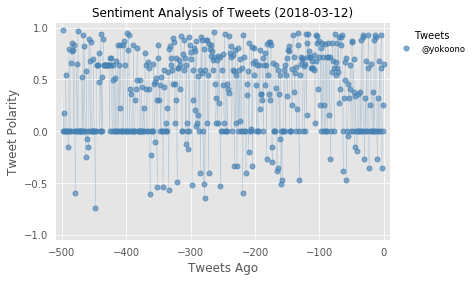

Tweet Author: yay_yeh
New Tweet Analysis: @ConanOBrien
[False, None, '@yokoono', '@ConanOBrien']


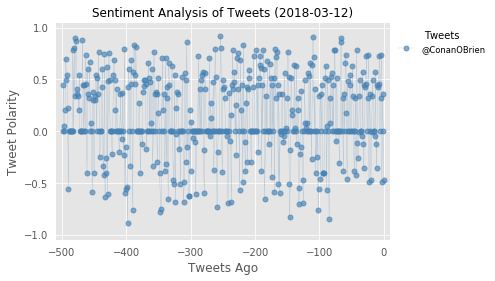

Tweet Author: yay_yeh
Oops: No new requests. @ConanOBrien already analyzed.
Tweet Author: lochnguyen
New Tweet Analysis: @realDonaldTrump
[False, None, '@yokoono', '@ConanOBrien', '@realDonaldTrump']


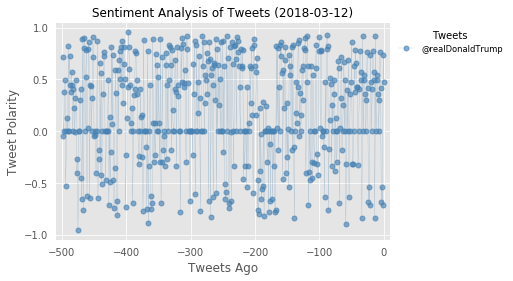

Tweet Author: lilwaaang
New Tweet Analysis: @BabyAnimaI
[False, None, '@yokoono', '@ConanOBrien', '@realDonaldTrump', '@BabyAnimaI']


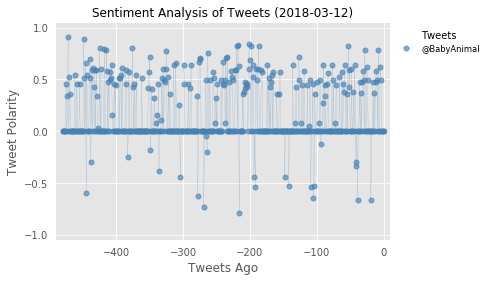

Tweet Author: lochnguyen
New Tweet Analysis: @NASA
[False, None, '@yokoono', '@ConanOBrien', '@realDonaldTrump', '@BabyAnimaI', '@NASA']


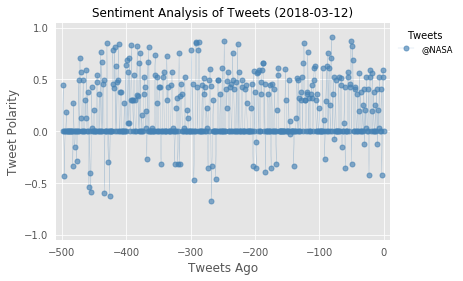

Tweet Author: lilwaaang
New Tweet Analysis: @Sethrogen
[False, None, '@yokoono', '@ConanOBrien', '@realDonaldTrump', '@BabyAnimaI', '@NASA', '@Sethrogen']


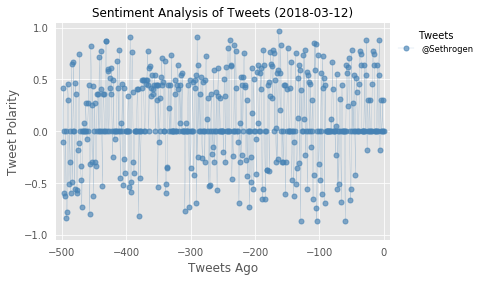

Tweet Author: lilwaaang
Oops: No new requests. @Sethrogen already analyzed.
Tweet Author: yay_yeh
New Tweet Analysis: @pourmecoffee
[False, None, '@yokoono', '@ConanOBrien', '@realDonaldTrump', '@BabyAnimaI', '@NASA', '@Sethrogen', '@pourmecoffee']


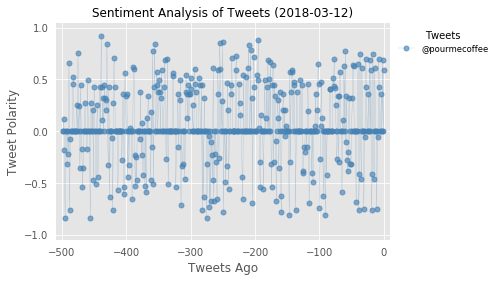

KeyboardInterrupt: 

In [96]:
# Set timer to run PlotBot24 every 5 minutes (300 seconds) for 24 hours
t_end = time.time() + 3600 * 24
accounts = [None]

while(time.time() < t_end):
    s_analyze()
    time.sleep(300)